> **Note:** You can use `Flight Price` and `Google Play Store` Dataset as per the discussion in lecture.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# `Flight Price:`

In [2]:
df = pd.read_excel('March/25 Mar/flight_price.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Q1. Load the flight price dataset and examine its dimensions. How many rows and columns does the dataset have?

In [4]:
df.shape

(10683, 11)

### Q2. What is the distribution of flight prices in the dataset? Create a histogram to visualize the distribution.


<AxesSubplot: title={'center': 'Flight Price'}, ylabel='Frequency'>

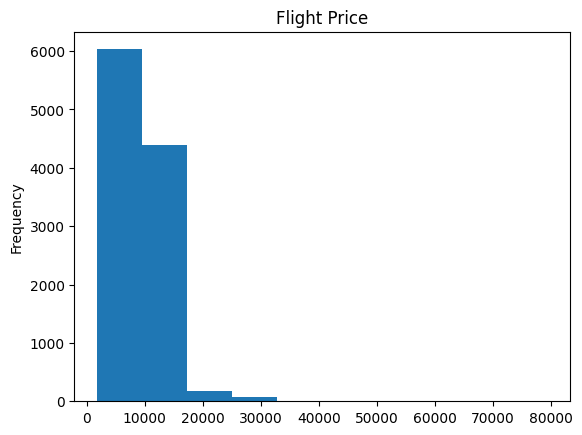

In [6]:
df['Price'].plot(kind='hist', title='Flight Price')

### Q3. What is the range of prices in the dataset? What is the minimum and maximum price?


In [9]:
min_price, max_price = df['Price'].quantile([0, 1]).astype(int)

print(f'Range of the flight price is from {min_price} to {max_price} Rupees.')
print('Minimum Price:', min_price)
print('Maximum Price:', max_price)

Range of the flight price is from 1759 to 79512 Rupees.
Minimum Price: 1759
Maximum Price: 79512


### Q4. How does the price of flights vary by airline? Create a boxplot to compare the prices of different airlines.


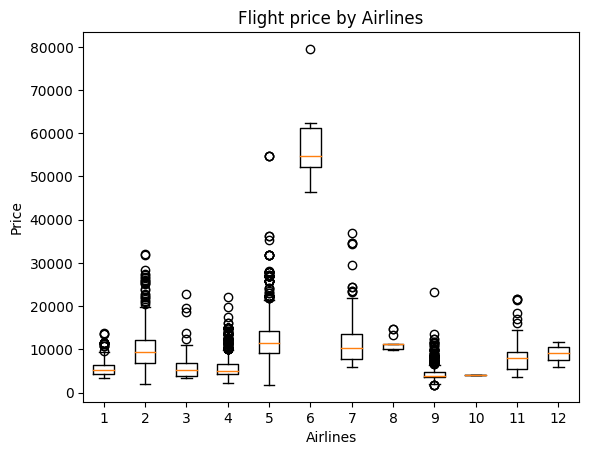

In [10]:
plt.boxplot(df.groupby('Airline')['Price'].apply(list))
plt.title('Flight price by Airlines')
plt.xlabel('Airlines')
plt.ylabel('Price')
plt.show()

### Q5. Are there any outliers in the dataset? Identify any potential outliers using a boxplot and describe how they may impact your analysis.


<AxesSubplot: >

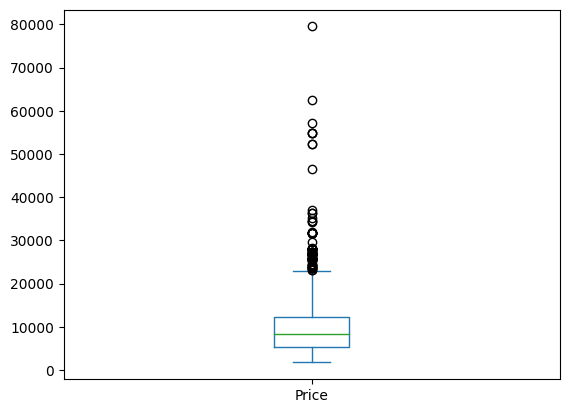

In [12]:
df['Price'].plot.box()

There is only one **numerical feature** in dataset as **Price** of the filghts.

> **Price** feature has many outliers. This is because many flights travels small distances within India but the outlier flight must be travel long-long distances around the glob.

### Q6. You are working for a travel agency, and your boss has asked you to analyze the Flight Price dataset to identify the peak travel season. What features would you analyze to identify the peak season, and how would you present your findings to your boss?


In [8]:
df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'], dayfirst=True)

<AxesSubplot: title={'center': 'Revenue per Months'}, xlabel='Date_of_Journey'>

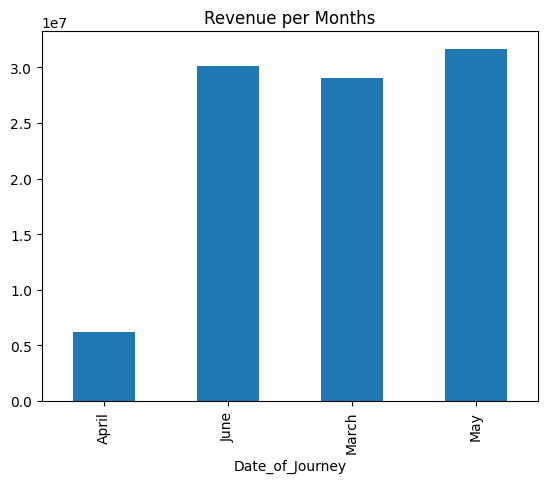

In [16]:
df.groupby(df['Date_of_Journey'].dt.month_name())['Price'].sum().plot.bar(title='Revenue per Months')

<AxesSubplot: title={'center': 'No. of Flights per Month'}, xlabel='Date_of_Journey'>

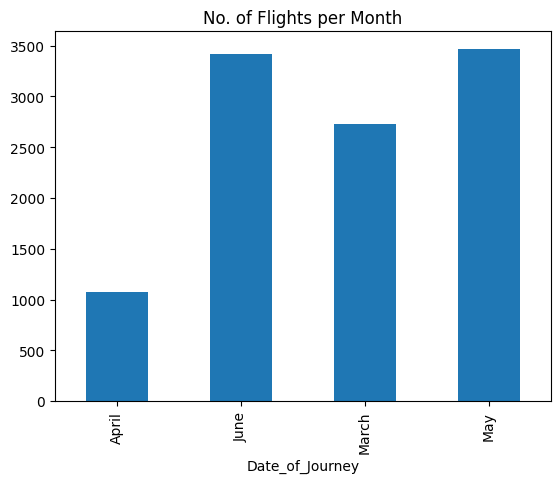

In [14]:
df.groupby(df['Date_of_Journey'].dt.month_name()).count()['Airline'].plot.bar(title='No. of Flights per Month')


Here, we can clearly see that the month of **March, May and June** had most Revenue and in these months very high number of Aeroplane takes fly.

### Q7. You are a data analyst for a flight booking website, and you have been asked to analyze the Flight Price dataset to identify any trends in flight prices. What features would you analyze to identify these trends, and what visualizations would you use to present your findings to your team?


In [30]:
df = df.sort_values('Date_of_Journey')

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

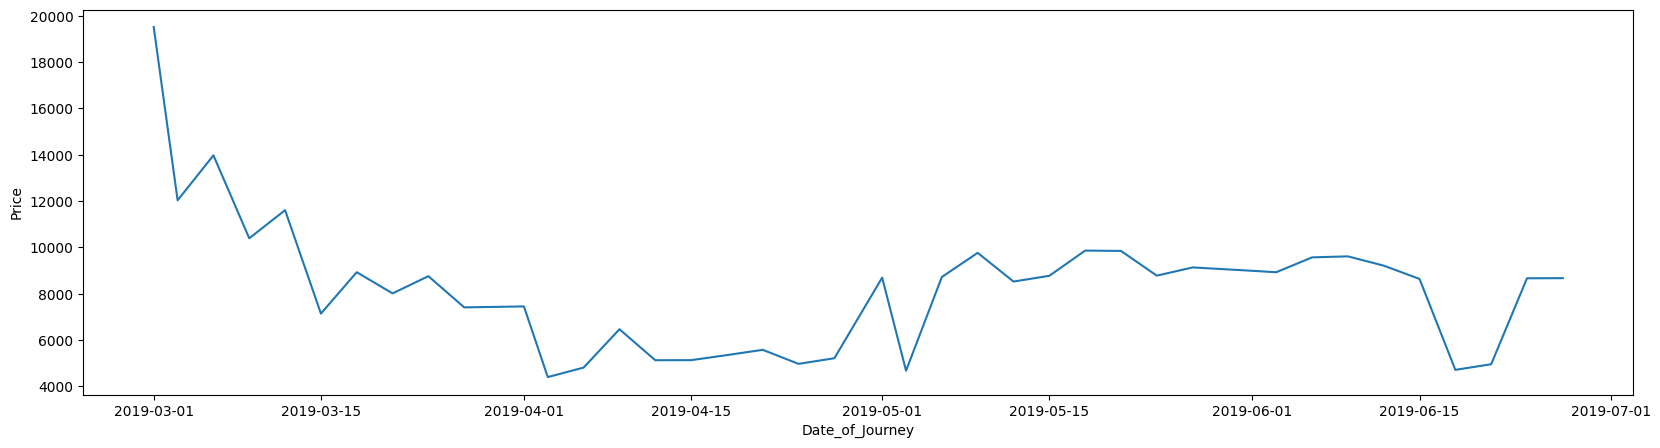

In [40]:
plt.figure(figsize=(20, 5))
sns.lineplot(df, x='Date_of_Journey', y='Price', errorbar=None)

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

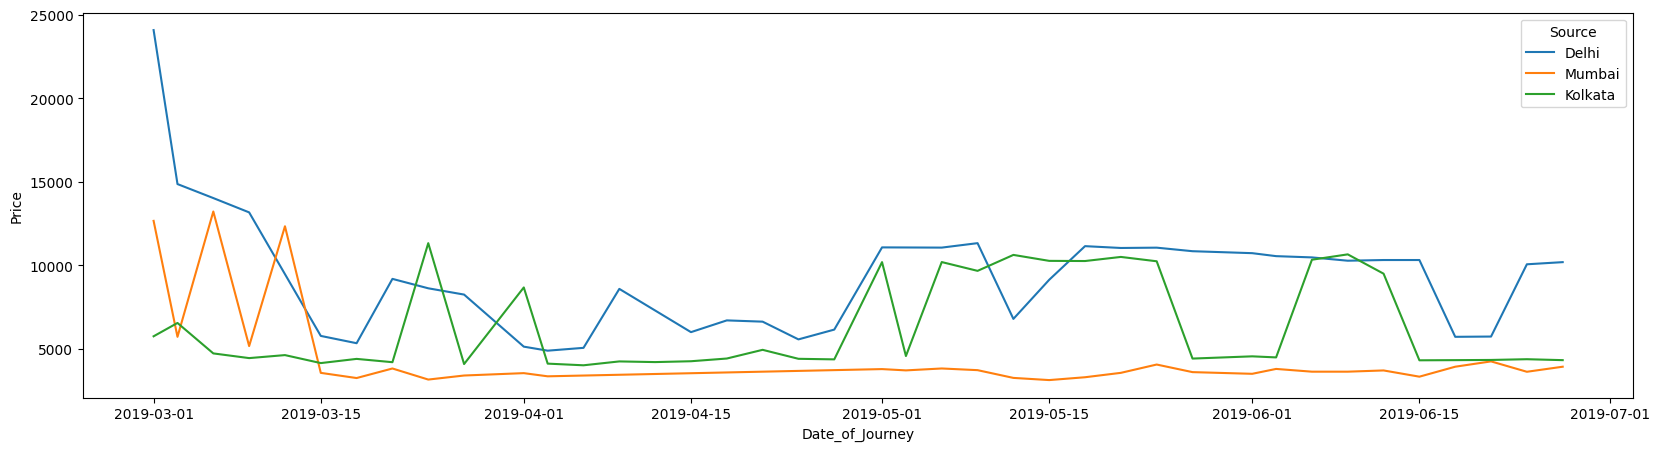

In [39]:
plt.figure(figsize=(20, 5))
sns.lineplot(df, x='Date_of_Journey', y='Price', hue='Source', errorbar=None,
             hue_order=['Delhi', 'Mumbai', 'Kolkata'])

In [41]:
df['Airline'].unique()

array(['Air India', 'IndiGo', 'Jet Airways', 'GoAir', 'SpiceJet',
       'Air Asia', 'Vistara Premium economy', 'Multiple carriers',
       'Jet Airways Business', 'Vistara', 'Trujet',
       'Multiple carriers Premium economy'], dtype=object)

<AxesSubplot: xlabel='Date_of_Journey', ylabel='Price'>

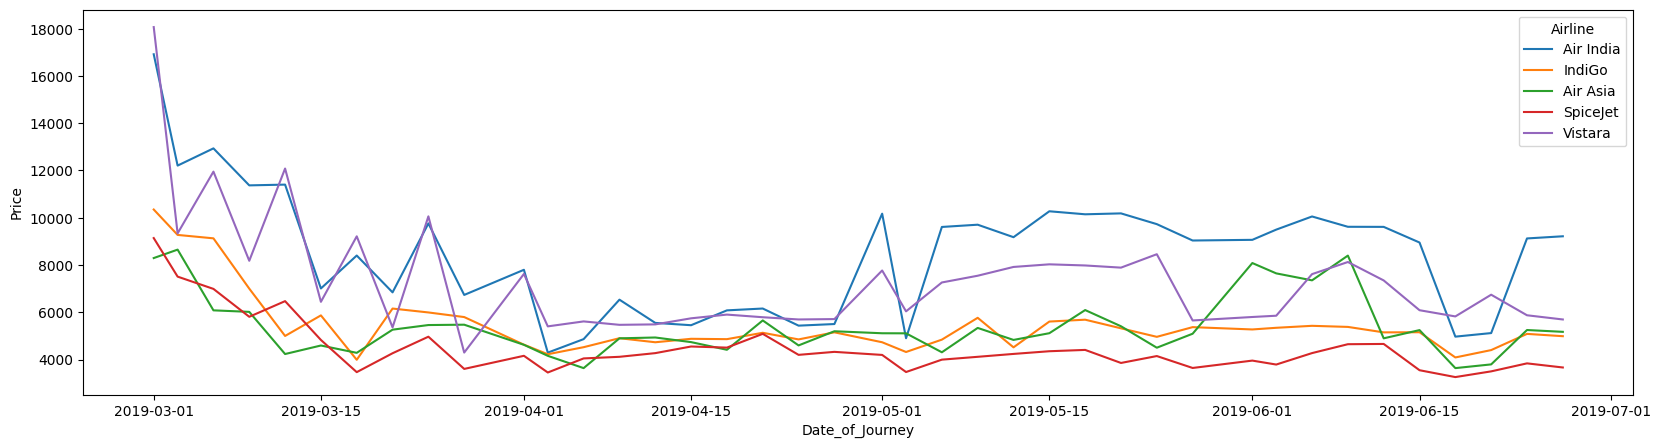

In [44]:
plt.figure(figsize=(20, 5))
sns.lineplot(df, x='Date_of_Journey', y='Price', hue='Airline', errorbar=None,
             hue_order=['Air India', 'IndiGo', 'Air Asia', 'SpiceJet', 'Vistara'])

### Q8. You are a data scientist working for an airline company, and you have been asked to analyze the Flight Price dataset to identify the factors that affect flight prices. What features would you analyze to identify these factors, and how would you present your findings to the management team?

In [50]:
df['Total_Stops'] = (df['Total_Stops']
                     .str.replace(r' stops?', '', regex=True)
                     .str.replace('non-stop', '0')
                     .astype(float))

<AxesSubplot: title={'center': 'Price distribution by Total Stops of a Flight'}, xlabel='Price', ylabel='Total_Stops'>

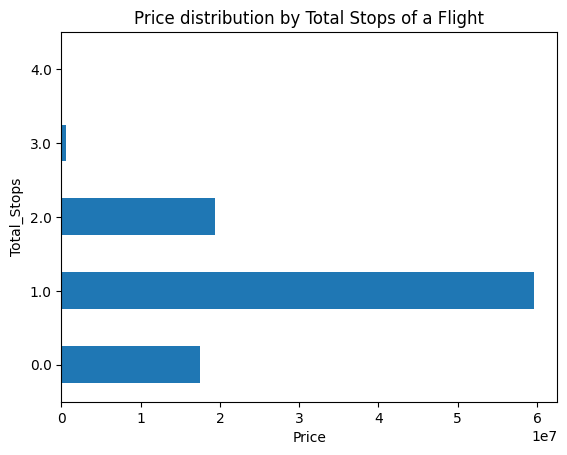

In [63]:
df.groupby('Total_Stops')['Price'].sum().plot(kind='barh',
                                              title='Price distribution by Total Stops of a Flight',
                                              xlabel='Price')

To identify the factors that affect flight prices from the Flight Price dataset, I would analyze the following features:

- **Date_of_Journey:** Analyze the variation in flight prices based on the day, week, month, or season of travel to identify if there are any trends in the dataset.

- **Airline:** Analyze the variation in flight prices based on the airline to identify if there are any airlines that offer consistently lower or higher prices than others.

- **Source and Destination:** Analyze the variation in flight prices based on the source and destination to identify if there are any routes that are more expensive than others.

- **Total_Stops:** Analyze the variation in flight prices based on the number of stops to identify if there is a correlation between the number of stops and ticket prices.

To present my findings to the management team, I would create a report that includes visualizations to help them easily understand the data. For example, I could create a heatmap that shows the average ticket prices by month and airline, and a scatterplot that shows the relationship between ticket prices and the number of stops.

# `Google Play Store:`

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [56]:
df['App'] = df['App'].str.replace(r' –.*', '', regex=True)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


### Q9. Load the Google Playstore dataset and examine its dimensions. How many rows and columns does the dataset have?

In [65]:
df.shape

(10841, 13)

### Q10. How does the rating of apps vary by category? Create a boxplot to compare the ratings of different app categories.


In [4]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [6]:
df.drop(index=df.query("Category=='1.9'").index, inplace=True)

<AxesSubplot: xlabel='Rating', ylabel='Category'>

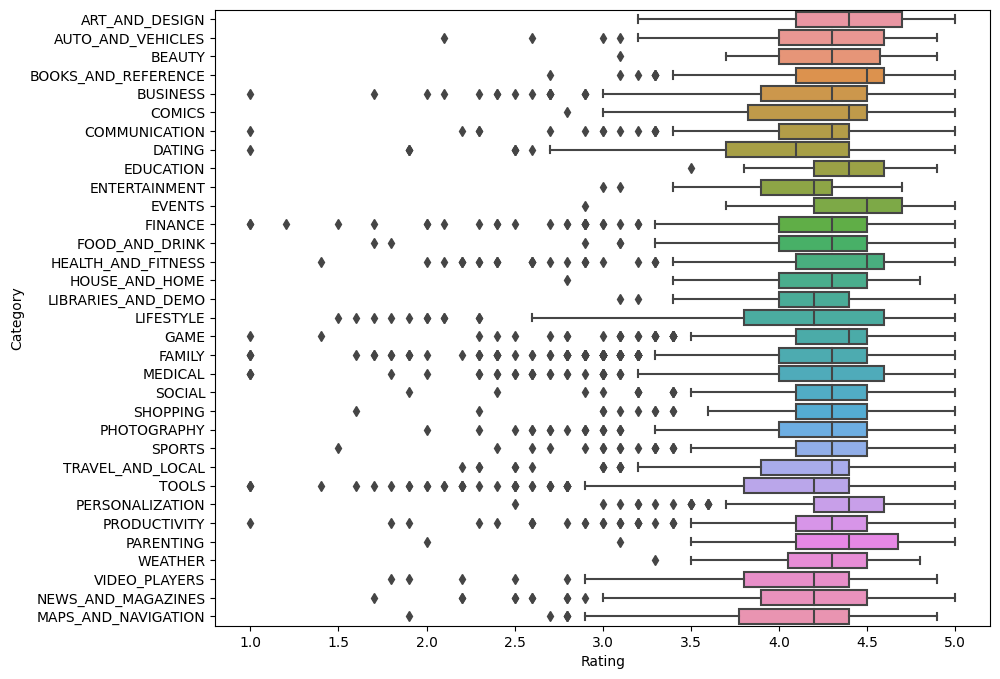

In [7]:
plt.figure(figsize=(10, 8))
sns.boxplot(df, y='Category', x='Rating', orient='h')

### Q11. Are there any missing values in the dataset? Identify any missing values and describe how they may impact your analysis.


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In this dataset, **Rating** feature has around **1474 missing values**.

These missing values leads to miss-interpretation from the analysis like if we impute the missing values using some statistical techniques like mean or median, then the median valued ratings' frequecy increases which make the conclusion bais.

### Q12. What is the relationship between the size of an app and its rating? Create a scatter plot to visualize the relationship.


In [17]:
# Feature engineering on Size column
def clean_size_col(x: str) -> float:
    x = x.lower()
    if 'm' in x:
        return float(x[:-1]) * 1024
    elif 'k' in x:
        return float(x[:-1])
    else:
        return np.nan

df['Size'] = df['Size'].apply(clean_size_col)

In [18]:
df['Size'].dtype

dtype('float64')

Text(0.5, 0, 'Size (in KB)')

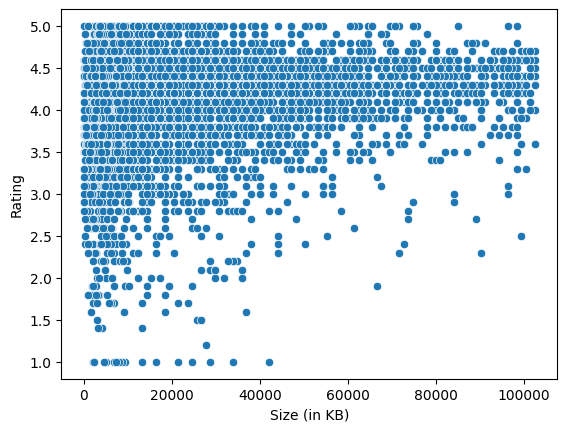

In [20]:
sns.scatterplot(df, x='Size', y='Rating')
plt.xlabel('Size (in KB)')

As the size of the app increases the ratings of the app remains high.

### Q13. How does the type of app affect its price? Create a bar chart to compare average prices by app type.


As the type suggests **Free** app has no price for installing.

In [24]:
paid_apps = df.query("Type=='Paid'")
paid_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
234,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6963.2,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
235,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39936.0,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
290,TurboScan: scan documents and receipts in PDF,BUSINESS,4.7,11442,6963.2,"100,000+",Paid,$4.99,Everyone,Business,"March 25, 2018",1.5.2,4.0 and up
291,Tiny Scanner Pro: PDF Doc Scan,BUSINESS,4.8,10295,39936.0,"100,000+",Paid,$4.99,Everyone,Business,"April 11, 2017",3.4.6,3.0 and up
427,Puffin Browser Pro,COMMUNICATION,4.0,18247,NaN,"100,000+",Paid,$3.99,Everyone,Communication,"July 5, 2018",7.5.3.20547,4.1 and up


In [ ]:
def clean_price_col(x: str) -> float:
    x = x.replace('$', '').replace('+', '')
    return float(x) * 81.8

df['Price'] = df['Price'].apply(clean_price_col)
paid_apps['Price'] = paid_apps['Price'].apply(clean_price_col)
df['Price'].dtype

In [34]:
f"Average price of paid apps is ₹{paid_apps['Price'].mean():.2f}"

'Average price of paid apps is ₹1138.72'

### Q14. What are the top 10 most popular apps in the dataset? Create a frequency table to identify the apps with the highest number of installs.


In [38]:
df['Installs'] = (df['Installs']
                  .str.replace(r'[\+,]', '', regex=True)
                  .astype(int))

In [57]:
(df.sort_values('Installs', ascending=False)
 [['App', 'Installs']]
 .head(10)
 .reset_index(drop=True))

,App,Installs
3896,Subway Surfers,1000000000
3943,Facebook,1000000000
335,Messenger,1000000000
3523,Google Drive,1000000000
3565,Google Drive,1000000000
2884,Google Photos,1000000000
3665,YouTube,1000000000
2853,Google Photos,1000000000
4234,Skype,1000000000
3687,Google Play Movies & TV,1000000000


### Q15. A company wants to launch a new app on the Google Playstore and has asked you to analyze the Google Playstore dataset to identify the most popular app categories. How would you approach this task, and what features would you analyze to make recommendations to the company?

To identify the most popular app categories in the Google Playstore dataset, we can approach the task in the following way:

- **Analyze the Category** column to identify the most common app categories in the dataset.
- **Analyze the Installs** column to identify the most popular app categories based on the number of installs.
- **Compare the results** of steps 2 and 3 to make recommendations to the company.

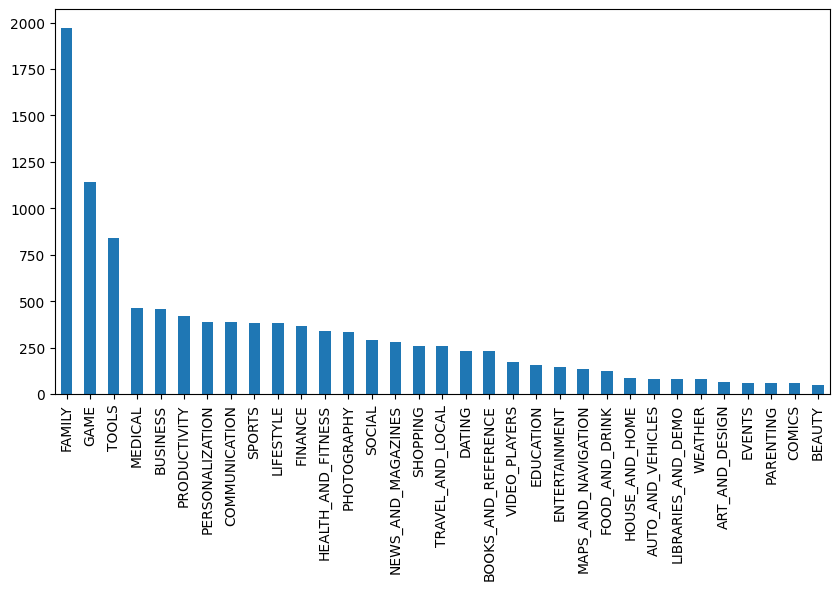

In [67]:
df['Category'].value_counts().plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=90)
plt.show()

### Q16. A mobile app development company wants to analyze the Google Play Store dataset to identify the most successful app developers. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the most successful app developers in the Google Playstore dataset, we can analyze the following features:

- **Developer:** We can analyze the number of apps published by each developer to identify the most prolific developers.
- **Rating:** We can analyze the average rating of apps published by each developer to identify the developers with the highest-rated apps.
- **Installs:** We can analyze the total number of app installs for each developer to identify the most popular developers.

To present our findings, we can use the following data visualizations:

- **Bar chart:** We can use a bar chart to visualize the number of apps published by each developer.
- **Scatter plot:** We can use a scatter plot to visualize the relationship between the average rating and the number of app installs for each developer.
- **Heatmap:** We can use a heatmap to visualize the total number of app installs for each developer by app category.

### Q17. A marketing research firm wants to analyze the Google Play Store dataset to identify the best time to launch a new app. What features would you analyze to make recommendations to the company, and what data visualizations would you use to present your findings?

To identify the best time to launch a new app on the Google Playstore, the following features can be analyzed:

- **Number of Installs:** The number of installs of the top apps can be analyzed to identify trends and patterns that indicate the best time to launch a new app.

- **Reviews and Ratings:** The reviews and ratings of the top apps can be analyzed to identify the most favorable time for launching a new app.

- **Category:** The category of the app can also play a significant role in identifying the best time to launch a new app. For instance, gaming apps may have a different trend as compared to education or productivity apps.

- **Seasonal Trends:** Some apps may have seasonal relevance. For example, an app related to tax filing may be launched around the tax season.

Data visualizations that can be used to present the findings include:

- **Line charts:** To show the trend of installs, ratings, and reviews over time.

- **Heat maps:** To show the popularity of app categories across different times of the year.

- **Bar charts:** To show the comparison of different categories or apps based on installs, ratings, or reviews.

- **Scatter plots:** To show the correlation between the number of installs and ratings or reviews over time.

[Reference Notebook](https://github.com/liskibruh/data-sciences-masters-course-notebooks/blob/main/Day051_Assignment.ipynb)